In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()
train_images=train_images/255.0
test_images=test_images/255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
model=keras.Sequential([keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
                        keras.layers.MaxPooling2D(2,2),
                        keras.layers.Flatten(),
                        keras.layers.Dense(128,activation='relu'),
                        keras.layers.Dense(10,activation='softmax')])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.8172 - loss: 0.5168
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9025 - loss: 0.2684
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.9172 - loss: 0.2215
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9363 - loss: 0.1749
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 87s 36ms/step - accuracy: 0.9462 - loss: 0.1473
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.9554 - loss: 0.1215
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 34ms/step - accuracy: 0.9629 - loss: 0.1008
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9695 - loss: 0.0833
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 89s 37ms/step - accuracy: 0.9746 - loss: 0.0692
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 36ms/step - accuracy: 0.9797 - loss: 0.0580


In [ ]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('Test Accuracy :',test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9084 - loss: 0.3760
Test Accuracy : 0.9103000164031982


In [ ]:
predictions=model.predict(test_images)
predicted_labels=np.argmax(predictions,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


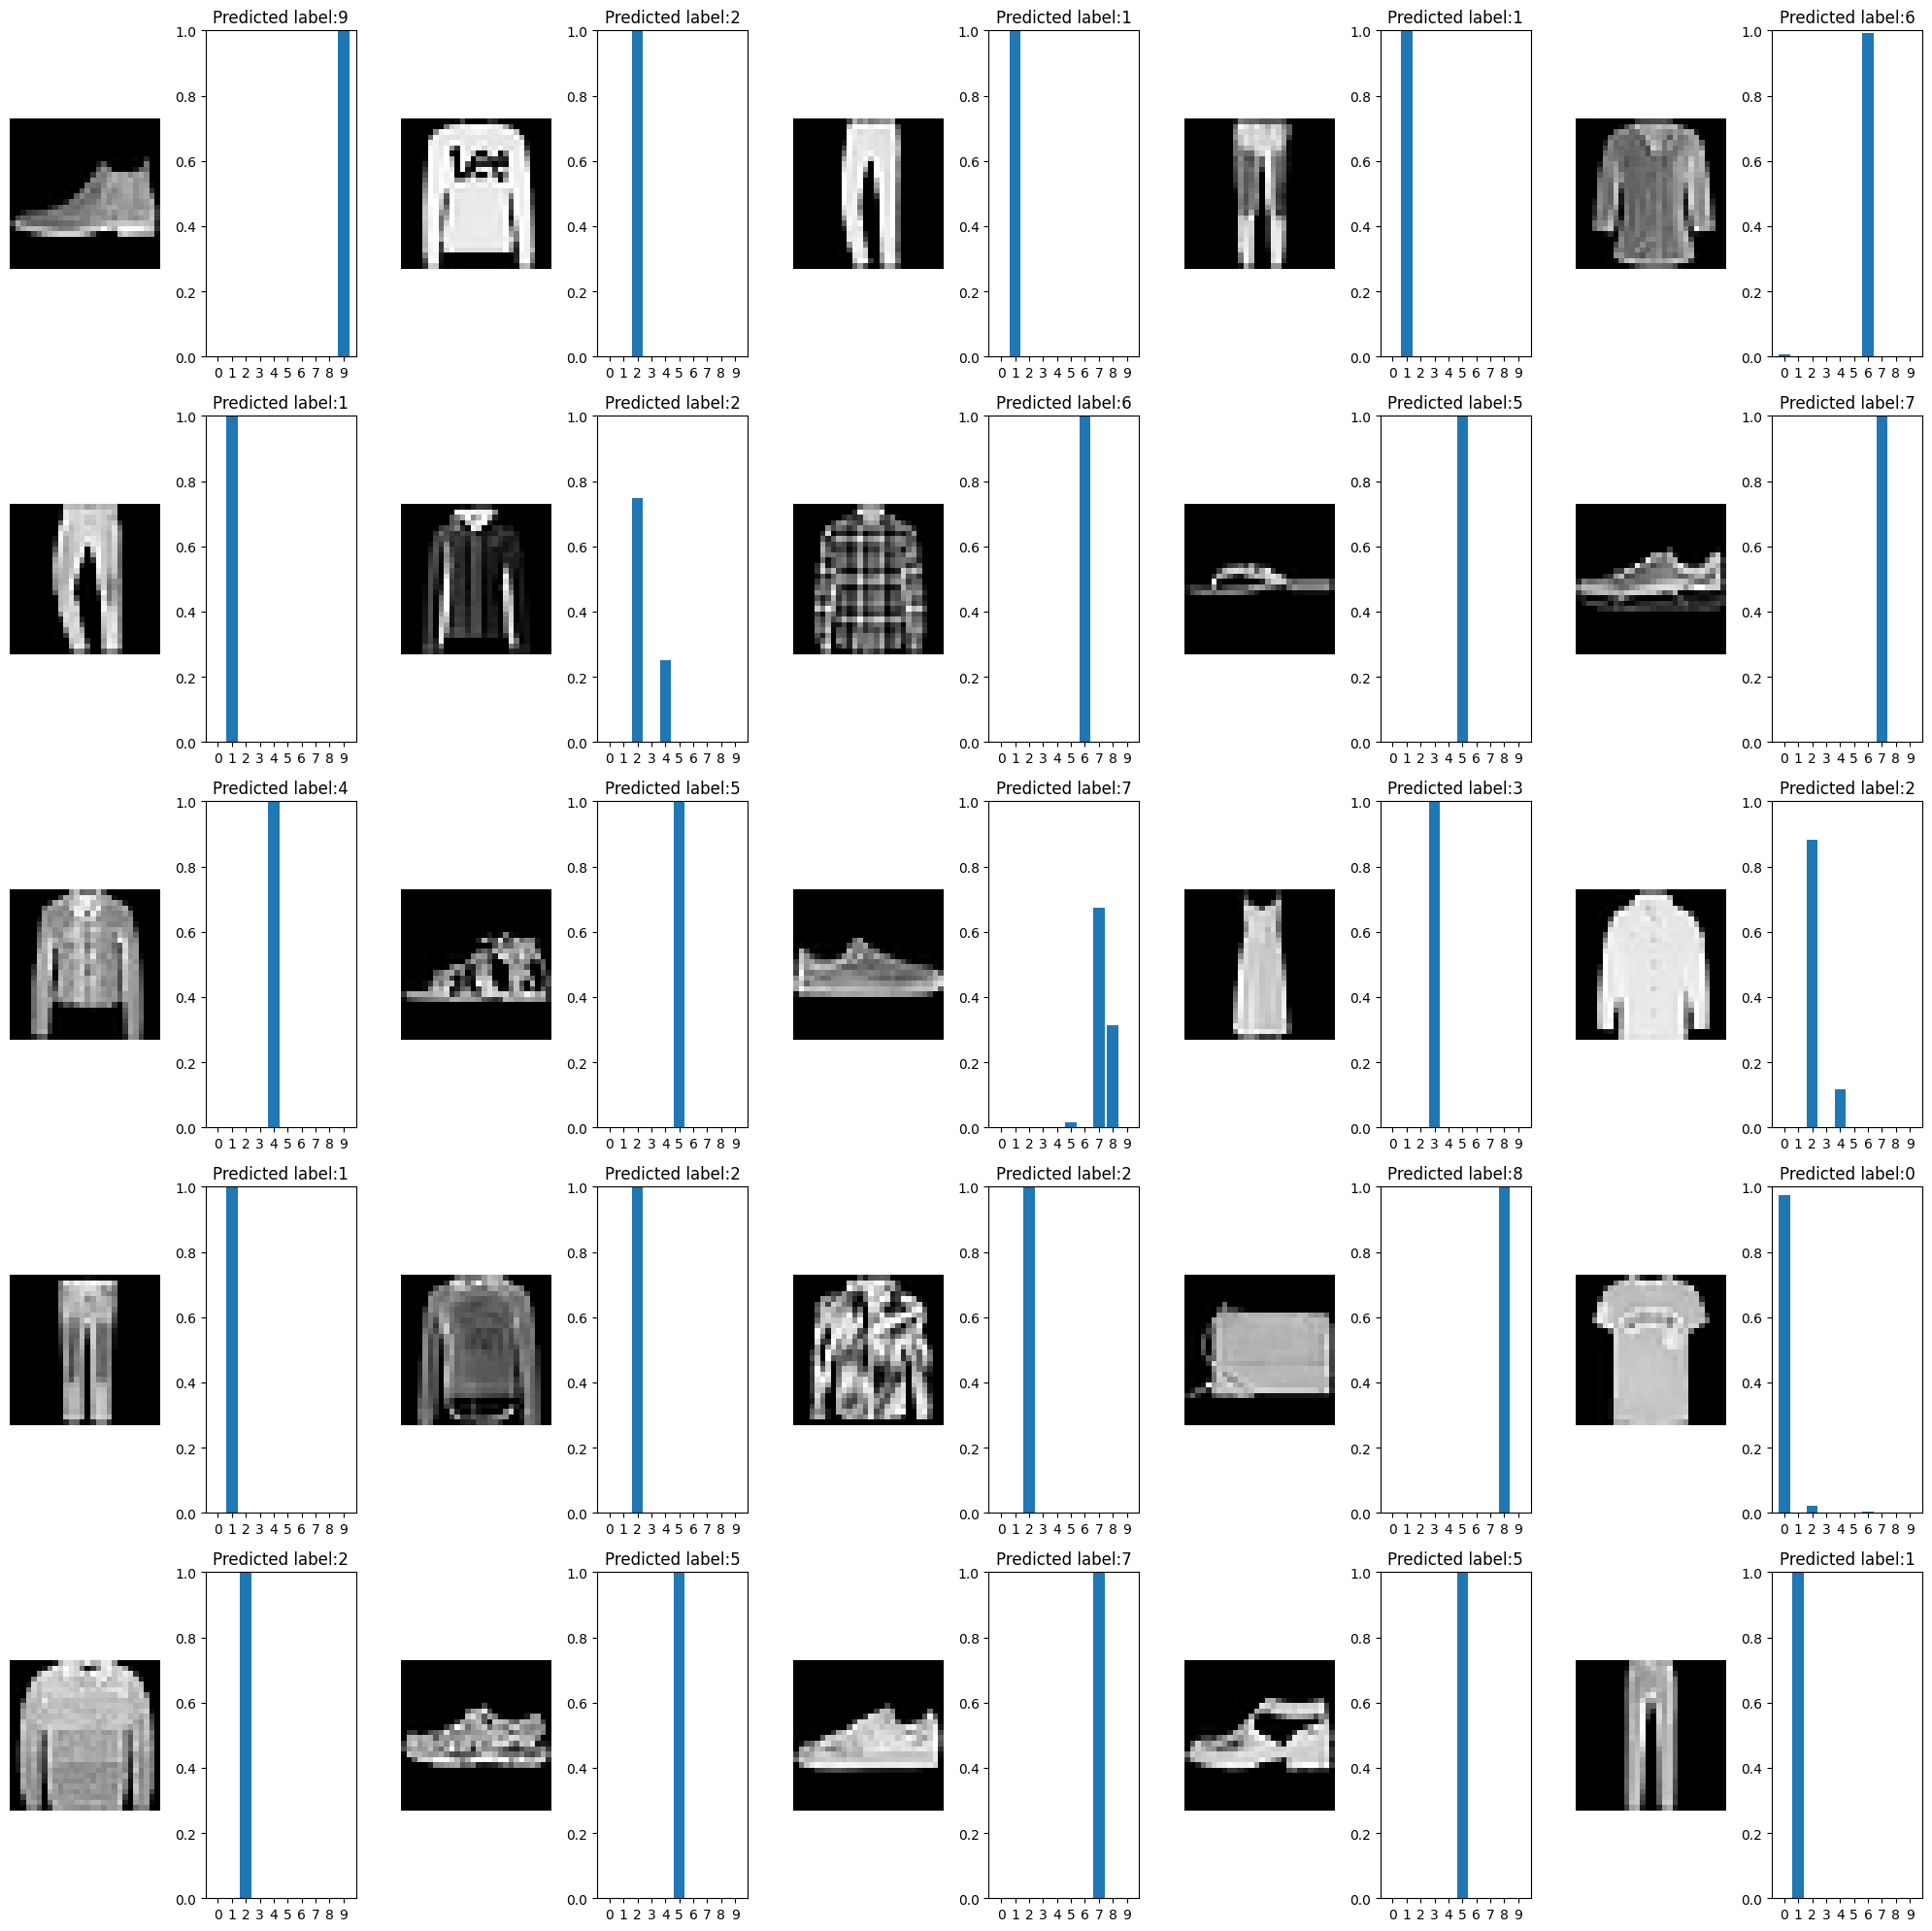

In [ ]:
num_rows=5
num_cols=5
num_images=num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plt.imshow(test_images[i],cmap='gray')
  plt.axis('off')
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plt.bar(range(10),predictions[i])
  plt.xticks(range(10))
  plt.ylim([0,1])
  plt.title(f"Predicted label:{predicted_labels[i]}")
plt.tight_layout()
plt.show()